<a href="https://colab.research.google.com/github/chizhenn/DS-ML-Projects/blob/main/Eye_Tracking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group Members**

|      NAME      |
|:--------------:|
| OOI CHIEN ZHEN    |
| LEE LIK SHEN   |
| LEE CHIAN YE |  
| SIEW WEI EN |  
| TEOH YU XUAN |
| SIZHAO ZOU |

**Research Question:**

How do high-performing users view and differentiate between AI-generated and real images?



**Note:**

High-performing users refer to people who are able to correctly differentiate between AI-generated and real images, particularly in cases where the images are difficult to compare and receive low correctness from other viewers.

**Objectives:**

- To analyze the eye movements (fixation count, average fixation duration, average gap duration) of high-performing users when viewing images.
- To identify the decision-making time (in microseconds) of high-performing users when choosing AI-generated image.
- To examine entropy values (Gaze Entropy X and Y) to assess the scanning behavior of high-performing users.
- To explore whether cognitive load (reflected through pupil dilation) affects performance outcomes.
- To determine the focus area (i.e., face region) of high-performing users when viewing images.


**Hypothesis:**

* High-performing users will exhibit a higher fixation count, moderate average fixation duration, and smooth transitions between fixations.
* High-performing users will demonstrate sufficient reasoning for decision-making while avoiding overthinking, typically taking around 10 seconds per image.
* High-performing users will have exploratory gaze patterns but still show mild directional biases.
* High-performing users will exhibit lower average pupil dilation, indicating stable cognitive and emotional states during image evaluation.
* High-performing users will spend a higher proportion of their fixation time on the face region.


## Part 1 - Research Scope


In [ ]:
import io
import requests
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


**Data source:**

https://drive.google.com/drive/folders/1kEeyJ2x8bcOMZCGo1LWFppKRBLjT9vJK?usp=sharing

**Import GenAI Response**

In [ ]:
import pandas as pd
import numpy as np
dataset = "/content/gdrive/MyDrive/cogSc/GenAI Response.xlsx"
dataset = pd.read_excel (dataset, header=0)

The dataset contains answer summaries for all participants. Through analysis, we can understand the performance of participants in differentiating between real and AI-generated pictures.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ParticipantID  87 non-null     object
 1   Pair1          87 non-null     object
 2   Pair2          87 non-null     object
 3   Pair3          87 non-null     object
 4   Pair4          87 non-null     object
 5   Pair5          87 non-null     object
 6   Pair6          87 non-null     object
dtypes: object(7)
memory usage: 4.9+ KB


There are 87 participants, 6 pairs of questions, and the answer to all questions is B.

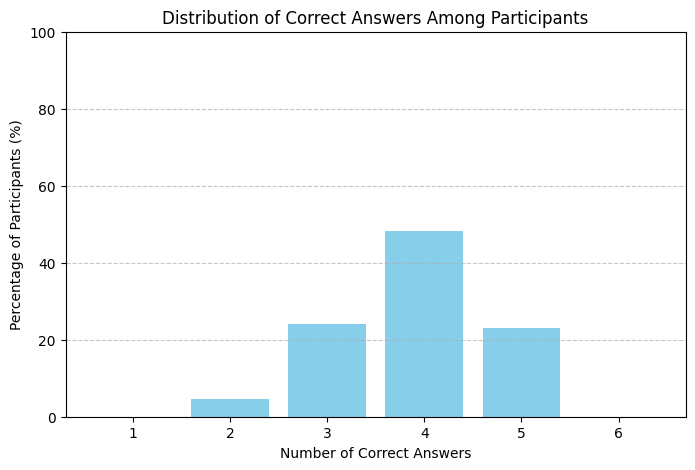

In [ ]:
import matplotlib.pyplot as plt

pair_columns = ['Pair1', 'Pair2', 'Pair3', 'Pair4', 'Pair5', 'Pair6']
dataset['Correct_Count'] = dataset[pair_columns].apply(lambda row: sum(row == 'B'), axis=1)
total = len(dataset)
percentage_summary = dataset['Correct_Count'].value_counts().sort_index()

correct_nums = list(range(1, 7))
percentages = [(percentage_summary.get(n, 0) / total) * 100 for n in correct_nums]

plt.figure(figsize=(8, 5))
plt.bar(correct_nums, percentages, color='skyblue')
plt.xlabel('Number of Correct Answers')
plt.ylabel('Percentage of Participants (%)')
plt.title('Distribution of Correct Answers Among Participants')
plt.xticks(correct_nums)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From the graph visualization, we can see that no one answered all six questions correctly. The correct answers are almost distributed among participants without obvious distinction.

Hence, it is difficult to compare high-performing users with others in terms of overall correctness. There might be no fixed criteria, and the analysis may not be meaningful for our research topic.

In [ ]:
percentage_of_B = (dataset[pair_columns].eq('B').sum() / len(dataset)) * 100
print("Percentage of Correct Answersn for Each Question")
print(percentage_of_B)

Percentage of Correct Answersn for Each Question
Pair1    100.000000
Pair2      8.045977
Pair3     90.804598
Pair4     70.114943
Pair5     32.183908
Pair6     88.505747
dtype: float64


From the percentages shown,we notice that some questions were answered correctly by many participants. For example, Pair 1 has 100% correctness. However, questions like Pair 2 and Pair 5 have correctness rates lower than 50%.

After careful consideration, we decided to focus on Pair 2, where the correctness rate is only 8.05%, or only 7 out of 87 participants answered it correctly. We are curious about how the correct participants viewed the image and aim to analyze the reasons or any common characteristics shared among them.

Since the correctness is low, the results of this analysis will be meaningful because the insights we summarize could reveal factors that that may have been overlooked by other participants and led to incorrect answers. This also helps us identify key success factors, especially in distinguishing between difficult-to-identify AI-generated and real images.


In [ ]:
participant_ids = dataset.loc[dataset['Pair2'] == 'B', 'ParticipantID']
print("High-performing User")
print(participant_ids)

High-performing User
8     P09
37    P38
41    P42
68    P69
71    P72
72    P73
73    P74
Name: ParticipantID, dtype: object


We have identified the specific participants who answered the Pair 2 question correctly, or we refer to them as high-performing users.

##Part 2 - Exploratory Data Analysis (EDA)

**Import GenAI Data**

In [ ]:
dataset2 = "/content/gdrive/MyDrive/cogSc/GenAI Data.xlsx"
dataset2 = pd.read_excel(dataset2, header=0)

We have now imported the eye-tracking dataset for the 7 participants, including only the time records during the viewing of the Pair 2 image. The dataset was exported from Tobii using the Data Export function, filtered to include only the high-performing users.

In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7430 entries, 0 to 7429
Data columns (total 90 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Recording timestamp [μs]                7424 non-null   float64
 1   Computer timestamp [μs]                 7424 non-null   float64
 2   Project name                            7424 non-null   object 
 3   Participant name                        7424 non-null   object 
 4   Recording resolution height [px]        7424 non-null   float64
 5   Recording resolution width [px]         7424 non-null   float64
 6   Recording monitor latency [ms]          7424 non-null   float64
 7   Average calibration accuracy [mm]       7424 non-null   float64
 8   Average calibration precision SD [mm]   7424 non-null   float64
 9   Average calibration precision RMS [mm]  7424 non-null   float64
 10  Average calibration accuracy [°]        7424 non-null   floa

After observation, we decided to drop columns 26–27 (related to events) and columns 79–89 (related to ungrouped data, client area, viewport, full page, and mouse position).

These columns contain fewer than 1,000 records, which are not meaningful for our analysis. Additionally, the nature of these data does not align with the research scope.

In [ ]:
# Drop columns by index range: 26–27 and 79–89
cols_to_drop = list(dataset2.columns[26:28]) + list(dataset2.columns[79:90])
dataset2 = dataset2.drop(columns=cols_to_drop)

dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7430 entries, 0 to 7429
Data columns (total 77 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Recording timestamp [μs]                7424 non-null   float64
 1   Computer timestamp [μs]                 7424 non-null   float64
 2   Project name                            7424 non-null   object 
 3   Participant name                        7424 non-null   object 
 4   Recording resolution height [px]        7424 non-null   float64
 5   Recording resolution width [px]         7424 non-null   float64
 6   Recording monitor latency [ms]          7424 non-null   float64
 7   Average calibration accuracy [mm]       7424 non-null   float64
 8   Average calibration precision SD [mm]   7424 non-null   float64
 9   Average calibration precision RMS [mm]  7424 non-null   float64
 10  Average calibration accuracy [°]        7424 non-null   floa

After cleaning, we now have 77 features, including identifiers such as recording timestamp, computer timestamp, eye tracker timestamp, project name, and participant name.

We have summarized the data dictionary, explaining the meaning and function of each feature. This provides us with a better understanding and preparation for the upcoming data analysis:

https://docs.google.com/document/d/1SgpZFcz4qBOH51icwYKbx7kCf2t6-Ht6ZyDsXwoshrQ/edit?usp=sharing

##Part 3 - Data Splitting

In [ ]:
dataset2['Participant name'] = dataset2['Participant name'].astype(str)

# Get the unique participant names
participants = dataset2['Participant name'].unique()
# Split the dataset by participant
participant_dfs = {p: dataset2[dataset2['Participant name'] == p].copy() for p in participants}

# Access individual participant DataFrames
dfP9 = participant_dfs['P9']
dfP38 = participant_dfs['P38']
dfP42 = participant_dfs['P42']
dfP69 = participant_dfs['P69']
dfP72 = participant_dfs['P72']
dfP73 = participant_dfs['P73']
dfP74 = participant_dfs['P74']

We have now split dataset2 into individual participant datasets. As a result, we have 7 datasets, each containing the eye-tracking data of high-performing users.

##Part 4 - Data Analysis

This is the main part of our research, where we compute several key metrics to showcase user viewing behavior. These metrics are derived and computed using features such as:

- 'Fixation point X [DACS px]'
- 'Eye movement event duration [ms]'
- 'Fixation point X [MCS norm]'
- 'Fixation point Y [MCS norm]'
- 'Recording timestamp [μs]'
- 'Pupil diameter left [mm]'
- 'Pupil diameter right [mm]'


In [ ]:
def analyze_eye_tracking_data(df, participant_id):
    results = {}

    # 1. Fixation count
    fixation_series = df['Fixation point X [DACS px]'].dropna()
    fixation_series = fixation_series.loc[fixation_series.shift() != fixation_series]
    results['Fixation Count'] = len(fixation_series)

    # 2. Average fixation duration
    valid_fixations = df.dropna(subset=['Fixation point X [DACS px]'])
    valid_fixations = valid_fixations.loc[valid_fixations['Fixation point X [DACS px]'].shift() != valid_fixations['Fixation point X [DACS px]']]
    results['Avg Fixation Duration (ms)'] = valid_fixations['Eye movement event duration [ms]'].mean()

    # 3. Time between fixations (gap average)
    df = df.copy()
    df['is_gap'] = df['Fixation point X [DACS px]'].isna()
    df['gap_group'] = (df['is_gap'] != df['is_gap'].shift()).cumsum()
    gap_groups = df[df['is_gap']].groupby('gap_group')
    gap_avg = gap_groups['Eye movement event duration [ms]'].mean().mean()
    results['Avg Gap Duration (ms)'] = gap_avg

    # 4. Gaze transition entropy horizontal and vertical
    valid_fixations['RegionX'] = valid_fixations['Fixation point X [MCS norm]'].apply(lambda x: 'Left' if x < 0.33 else 'Right' if x > 0.66 else 'Center')
    valid_fixations['Region ShiftX'] = valid_fixations['RegionX'].shift(-1)
    transition_countsX = valid_fixations.groupby(['RegionX', 'Region ShiftX']).size().reset_index(name='Count')
    probX = transition_countsX['Count'] / transition_countsX['Count'].sum()
    results['Gaze Entropy X'] = -(probX * np.log2(probX)).sum()

    valid_fixations['RegionY'] = valid_fixations['Fixation point Y [MCS norm]'].apply(lambda y: 'Top' if y < 0.33 else 'Bottom' if y > 0.66 else 'Middle')
    valid_fixations['Region ShiftY'] = valid_fixations['RegionY'].shift(-1)
    transition_countsY = valid_fixations.groupby(['RegionY', 'Region ShiftY']).size().reset_index(name='Count')
    probY = transition_countsY['Count'] / transition_countsY['Count'].sum()
    results['Gaze Entropy Y'] = -(probY * np.log2(probY)).sum()

    # 5. Revisit count
    revisit_X = valid_fixations['RegionX'].value_counts()
    revisit_Y = valid_fixations['RegionY'].value_counts()
    results['Revisit X'] = revisit_X.to_dict()
    results['Revisit Y'] = revisit_Y.to_dict()

    # 6. Decision time
    results['Decision Time (μs)'] = df['Recording timestamp [μs]'].max() - df['Recording timestamp [μs]'].min()

    # 7. Pupil dilation
    results['Avg Pupil Left (mm)'] = df['Pupil diameter left [mm]'].mean()
    results['Avg Pupil Right (mm)'] = df['Pupil diameter right [mm]'].mean()

    return {participant_id: results}


Here are the brief explanations of each key metric:

| **Metric Name**                          | **Brief Explanation**                                                       | **How It’s Computed**                                                                                      |
| ---------------------------------------- | --------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------- |
| **Fixation Count**                       | Number of times the gaze fixates on specific points.                        | Count of unique fixation points by removing consecutive duplicates in X fixation data.                     |
| **Average Fixation Duration**            | Average time spent per fixation.                                            | Average duration of all valid fixation events.                                                             |
| **Time Between Fixations (Gap Average)** | Average duration between the end of one fixation and the start of the next. | Average duration of gaps (non-fixation periods) between fixations.                                         |
| **Gaze Transition Entropy**              | Complexity or randomness of gaze path transitions.                          | Categorize fixations into regions, count transitions, calculate probabilities, then compute entropy value. |
| **Revisit Count**                        | Number of times a user returns to the same area.                            | Count how many times each fixation region (X and Y) is revisited.                                          |
| **Decision Time**                        | Time taken to make a decision.                                              | Total time spent viewing (last timestamp minus first timestamp).                                           |
| **Pupil Dilation**                       | Change in pupil size, often linked to cognitive load.                       | Average pupil diameter for left and right eyes during viewing.                                             |



All metrics are computed within a single function. Any dataset can directly call this function to access and return the required results.

**Result**

In [ ]:
results = {}
results.update(analyze_eye_tracking_data(dfP9, "P9"))
results.update(analyze_eye_tracking_data(dfP38, "P38"))
results.update(analyze_eye_tracking_data(dfP42, "P42"))
results.update(analyze_eye_tracking_data(dfP69, "P69"))
results.update(analyze_eye_tracking_data(dfP72, "P72"))
results.update(analyze_eye_tracking_data(dfP73, "P73"))
results.update(analyze_eye_tracking_data(dfP74, "P74"))

comparison_df = pd.DataFrame(results).T
print(comparison_df)


    Fixation Count Avg Fixation Duration (ms) Avg Gap Duration (ms)  \
P9              39                 256.153846             38.425837   
P38             18                 253.444444             48.783779   
P42             20                     223.75            191.216922   
P69             23                 292.782609             39.909091   
P72             22                 305.954545             38.428571   
P73             33                 235.272727             42.694612   
P74             23                 297.913043             42.759406   

    Gaze Entropy X Gaze Entropy Y                               Revisit X  \
P9        2.826454       2.063887  {'Center': 20, 'Left': 12, 'Right': 7}   
P38       2.181206       2.542483   {'Center': 11, 'Right': 6, 'Left': 1}   
P42       0.879506       2.610064              {'Center': 17, 'Right': 3}   
P69       2.153565       2.491967   {'Center': 15, 'Right': 7, 'Left': 1}   
P72       2.606138       1.911093   {'Center':

**Note:**

Entropy is calculated using log₂, so:

The maximum possible entropy when transitioning between 3 equally likely regions (L/C/R) is log₂(3) ≈ 1.58.


However, when we track transitions between pairs (e.g. Left → Center, Center → Right, etc.), there are 9 possible transitions (3×3), so:

Max entropy = log₂(9) ≈ 3.17


3.17 = total randomness, 0 = perfectly predictable.


**Note:**

Pupil dilation is analyzed by comparing the sizes of the left and right pupils. A difference of 0.5 mm or less is considered normal and indicates a neutral state, without extreme excitement or stress.

For example, if the left pupil is 3.09 mm and the right pupil is 3.32 mm, the difference is 0.23 mm, which falls within the normal range.

The 0.5 mm threshold for normal pupil size differences (anisocoria) is based on clinical research and physiological studies of healthy individuals.

##Part 5 - Insights Summary

###Part 5.1 - Unprioritized Metrics

To better understand the visualized pattern of high-performing users in differentiating AI images, we need to compute the mean, minimum, and maximum (to know the acceptable range of the metric), as well as the variance and standard deviation to identify which column is stable and reliable to use.


                                  Mean        Min         Max              Variance         Std Dev
Fixation Count               25.428571         18          39             58.285714        7.634508
Avg Fixation Duration (ms)  266.467316     223.75  305.954545           1052.400665       32.440725
Avg Gap Duration (ms)        63.174031  38.425837  191.216922           3200.715514       56.574866
Decision Time (μs)           7999005.0  5350160.0  11191915.0  3344040577499.666504  1828671.806941


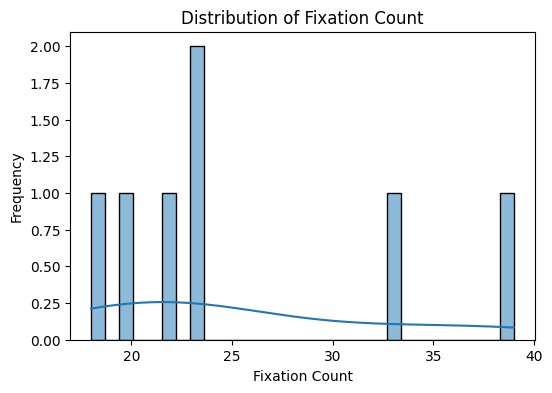

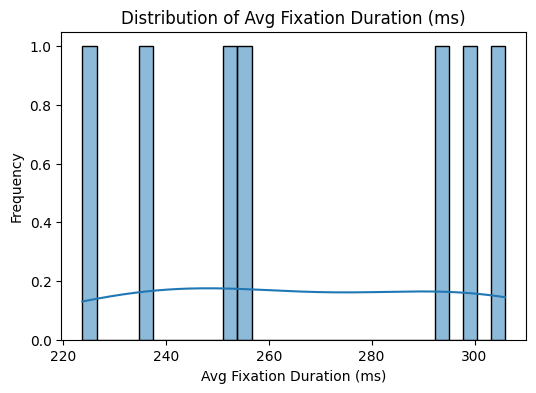

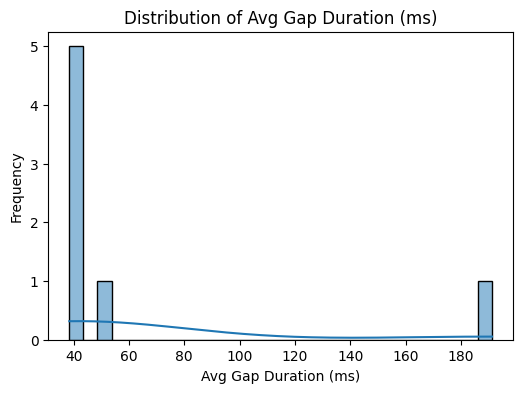

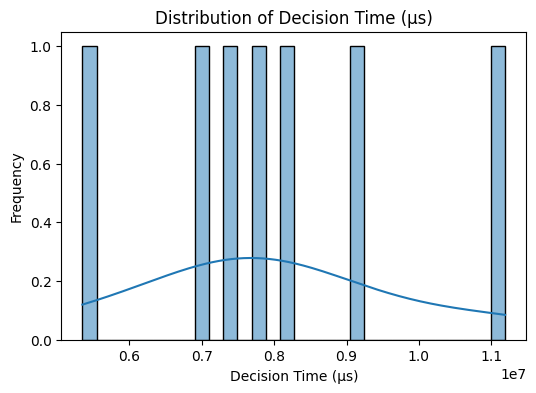

In [ ]:
import seaborn as sns

# Drop non-numeric columns
numeric_df = comparison_df.drop(columns=['Revisit X', 'Revisit Y','Gaze Entropy X','Gaze Entropy Y','Avg Pupil Left (mm)','Avg Pupil Right (mm)'])

# Compute summary statistics
summary_stats = pd.DataFrame({
    'Mean': numeric_df.mean(),
    'Min': numeric_df.min(),
    'Max': numeric_df.max(),
    'Variance': numeric_df.var(),
    'Std Dev': numeric_df.std()
})

print(summary_stats.to_string())

# Plot histograms for each column
for col in numeric_df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(numeric_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Based on the summary, the acceptable range for each metric is:


| Metric                     | Acceptable Range           | Optimum Value |
| -------------------------- | -------------------------- | ------------- |
| Fixation Count             | 18 – 39                    | 25.428571     |
| Avg Fixation Duration (ms) | 223.75 – 305.954545        | 266.467316    |
| Avg Gap Duration (ms)      | 38.425837 – 191.216922     | 63.174031     |
| Decision Time (μs)         | 5,350,160.0 – 11,191,915.0 | 7,999,005.0   |


However, these features are not the prioritized success metrics because the variance and standard deviation are quite wide.

###Part 5.2 - Gaze Entropy X & Y


Statistics for Gaze Entropy X:
Mean: 2.260
Min: 0.880
Max: 2.826
Std Dev: 0.612
Normalized Mean (relative to max 3.17): 71.29%

Statistics for Gaze Entropy Y:
Mean: 2.304
Min: 1.911
Max: 2.610
Std Dev: 0.241
Normalized Mean (relative to max 3.17): 72.69%


<ipython-input-14-2277516331>:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([gaze_entropy_x, gaze_entropy_y], labels=['X Direction', 'Y Direction'])


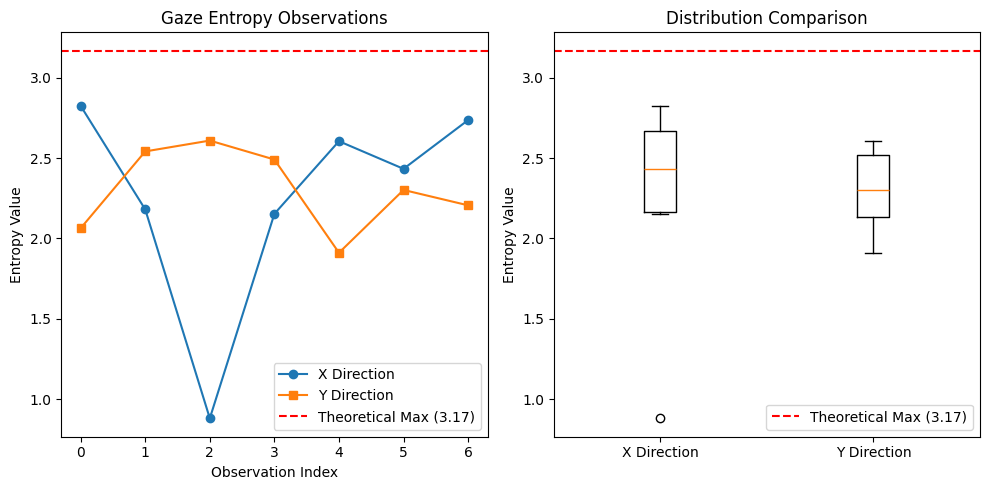

In [ ]:
gaze_entropy_x = comparison_df['Gaze Entropy X'].values
gaze_entropy_y = comparison_df['Gaze Entropy Y'].values

max_entropy = np.log2(9)  # ≈3.17

def compute_stats(data, name):
    print(f"\nStatistics for {name}:")
    print(f"Mean: {np.mean(data):.3f}")
    print(f"Min: {np.min(data):.3f}")
    print(f"Max: {np.max(data):.3f}")
    print(f"Std Dev: {np.std(data):.3f}")
    print(f"Normalized Mean (relative to max {max_entropy:.2f}): {np.mean(data)/max_entropy:.2%}")

compute_stats(gaze_entropy_x, "Gaze Entropy X")
compute_stats(gaze_entropy_y, "Gaze Entropy Y")

plt.figure(figsize=(10, 5))

# Plot individual observations
plt.subplot(1, 2, 1)
plt.plot(gaze_entropy_x, 'o-', label='X Direction')
plt.plot(gaze_entropy_y, 's-', label='Y Direction')
plt.axhline(y=max_entropy, color='r', linestyle='--', label='Theoretical Max (3.17)')
plt.xlabel('Observation Index')
plt.ylabel('Entropy Value')
plt.title('Gaze Entropy Observations')
plt.legend()

# Plot distribution
plt.subplot(1, 2, 2)
plt.boxplot([gaze_entropy_x, gaze_entropy_y], labels=['X Direction', 'Y Direction'])
plt.axhline(y=max_entropy, color='r', linestyle='--', label='Theoretical Max (3.17)')
plt.ylabel('Entropy Value')
plt.title('Distribution Comparison')
plt.legend()

plt.tight_layout()
plt.show()

- Entropy X (71.3% of max): Horizontal gaze shifts are highly random but slightly more structured than vertical ones (due to higher variability, including one low outlier at 0.88).

- Entropy Y (72.7% of max): Vertical gaze shifts are consistently random, with values tightly clustered around ~2.3, indicating steady, exploratory behavior.

Both are closer to randomness (~70%) than to perfect predictability (0%), meaning gaze patterns are exploratory but still show mild directional biases. The X-direction’s wider range suggests occasional moments of focused attention (e.g., fixating on a single object).

Based on the summary, the acceptable range for Entropy is:


| Entropy                     | Acceptable Range           | Optimum Value |
| -------------------------- | -------------------------- | ------------- |
| X            | 0.880 - 2.826                    | 2.260     |
| Y | 1.911 - 2.610        | 2.304    |

Gaze Entropy X and Y are prioritized success metrics because their standard deviations are small and stable.

###Part 5.3 - Avg Pupil Dilation Difference

In [ ]:
mean_left = comparison_df['Avg Pupil Left (mm)'].mean()
sd_left = comparison_df['Avg Pupil Left (mm)'].std()
mean_right = comparison_df['Avg Pupil Right (mm)'].mean()
sd_right = comparison_df['Avg Pupil Right (mm)'].std()

# Compute the difference (absolute value)
pupil_diff = abs(mean_left - mean_right)

print(f"Absolute Difference: {pupil_diff:.2f} mm")
print(f"Std Dev (Avg Pupil Left): {sd_left:.2f}")
print(f"Std Dev (Avg Pupil Right): {sd_right:.2f}")


Absolute Difference: 0.08 mm
Std Dev (Avg Pupil Left): 0.23
Std Dev (Avg Pupil Right): 0.29


The result of 0.08 mm shows that the difference in pupil dilation between the left and right eyes is minimal and well within the normal range (≤0.5 mm), indicating no signs of abnormal emotional or medical responses.

Based on the summary, the acceptable range for average pupil dilation is ≤0.5 mm. However, 0.08 mm is considered the optimal value.










Average Pupil Left and Right are prioritized success metrics because their standard deviations are small and stable.

###Part 5.4 - Revisit X & Y

Total Revisits:
Center: 105 (59.0%)
Left: 28 (15.7%)
Right: 45 (25.3%)


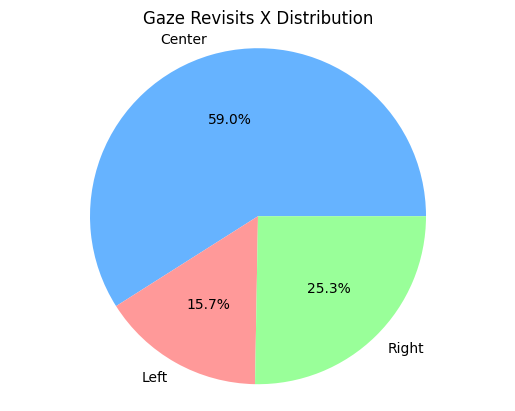

In [ ]:
total = {'Center': 0, 'Left': 0, 'Right': 0}
for entry in comparison_df['Revisit X']:
    for region in total:
        total[region] += entry.get(region, 0)  # Default to 0 if key missing

# Calculate percentages
sum_revisitsX = sum(total.values())
percentagesX = {region: (count / sum_revisitsX) * 100 for region, count in total.items()}

print("Total Revisits:")
for region, count in total.items():
    print(f"{region}: {count} ({percentagesX[region]:.1f}%)")

# Pie chart
plt.pie(percentagesX.values(), labels=percentagesX.keys(), autopct='%1.1f%%', colors=['#66b3ff', '#ff9999', '#99ff99'])
plt.title("Gaze Revisits X Distribution")
plt.axis('equal')
plt.show()

Total Revisits:
Middle: 101 (56.7%)
Top: 41 (23.0%)
Bottom: 36 (20.2%)


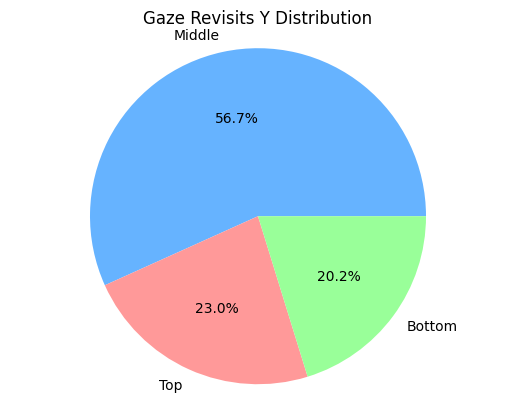

In [ ]:
total = {'Middle': 0, 'Top': 0, 'Bottom': 0}
for entry in comparison_df['Revisit Y']:
    for region in total:
        total[region] += entry.get(region, 0)  # Default to 0 if key missing

# Calculate percentages
sum_revisitsY = sum(total.values())
percentagesY = {region: (count / sum_revisitsY) * 100 for region, count in total.items()}

print("Total Revisits:")
for region, count in total.items():
    print(f"{region}: {count} ({percentagesY[region]:.1f}%)")

# Pie chart
plt.pie(percentagesY.values(), labels=percentagesY.keys(), autopct='%1.1f%%', colors=['#66b3ff', '#ff9999', '#99ff99'])
plt.title("Gaze Revisits Y Distribution")
plt.axis('equal')
plt.show()

Based on the analysis, the focus or major revisit time for high-performing users is on the center and middle of the images, which, according to the attached pictures, is the facial area of the people, because it's where AI mistakes are easier to spot—like unnatural skin, eyes, or expressions.

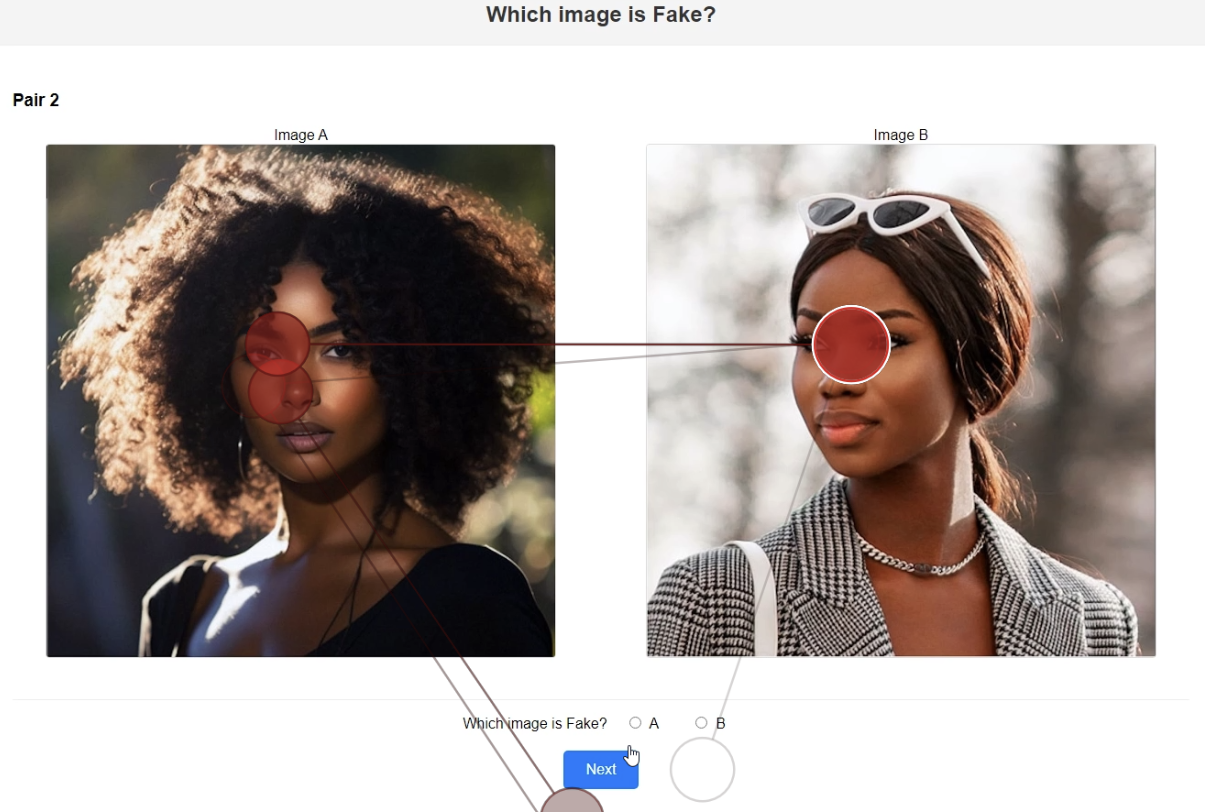

##Part 6 - Conslusion

| **Category**       | **Metric**                 | **Acceptable Range**        | **Optimum Value**                   | **Reliability** |
| ------------------ | -------------------------- | --------------------------- | ----------------------------------- | --------------- |
| **Eye Movement**   | Fixation Count             | 18 – 39                     | 25.43                               |                |
|                    | Avg Fixation Duration (ms) | 223.75 – 305.95             | 266.47                              |                |
|                    | Avg Gap Duration (ms)      | 38.43 – 191.22              | 63.17                               |                |
|                    | Decision Time (μs)         | 5,350,160 – 11,191,915      | 7,999,005                           |                |
| **Entropy**        | Gaze Entropy X             | 0.880 – 2.826               | 2.260                               | /               |
|                    | Gaze Entropy Y             | 1.911 – 2.610               | 2.304                               | /               |
| **Pupil Dilation** | Avg Pupil Dilation Difference (mm)    | ≤ 0.5                      | 0.08                                | /               |
| **Visual Focus**   | Focus Area                 | Center/Middle | Face Region | /               |


The videos for each high-performing user in visualizing Pair 2 can be found here:

https://drive.google.com/drive/folders/1o5NLgcrjStpNEAuTcdFe2eL5Z6lhwAxQ?usp=sharing

The **project objectives have been fully achieved**, and the **hypotheses are accepted**, as reflected in the insights and conclusion.


However, we know that understanding raw summarized data can be challenging for participants. Here are actionable suggestions to improve the success rate in differentiating AI-generated and real pictures:

| **Category**       | **Metric**                         | **Actionable Suggestion**                                                            |
| ------------------ | ---------------------------------- | ------------------------------------------------------------------------------------ |
| **Eye Movement**   | Fixation Count (18–39)             | **Increase fixations**: Scan more slowly and deliberately to cover all key areas.        |
|                    | Avg Fixation Duration (223–305 ms) | **Pause 250–300 ms per spot**: Avoid rushing or staring too long. Use a timer if needed. |
|                    | Avg Gap Duration (38–191 ms)       | **Smooth transitions**: Practice moving eyes steadily between points (no sudden jumps).  |
|                    | Decision Time (5.4–11.2M μs)       | **Balance speed/accuracy**: Spend 5 -10 seconds viewing, reasoning, then deciding, avoid overthinking.              |
| **Entropy**        | Gaze Entropy X (0.88–2.83)         | **Scan edges more:** If too low, widen gaze; if too high, focus more on the center.      |
|                    | Gaze Entropy Y (1.91–2.61)         | **Vary vertical gaze:** Look up/down more evenly (not just middle).                      |
| **Pupil Dilation** | Pupil Difference (≤0.5 mm)         | **Relax before tasks**: Breathe deeply to reduce stress-induced asymmetry.               |
| **Visual Focus**   | Focus Area (Center/Middle)         | **Start with faces**: Prioritize eyes/nose/mouth, then check periphery.                  |


**THE END**